In [1]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    value='{0:.2f}'.format(r)+unidade
    print('A resposta final é:')
    display(sy.symbols(value))
    

In [2]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    value='{0:.2f}'.format(r)+unidade
    print('A resposta final é:')
    display(sy.symbols(value))
    

# T1

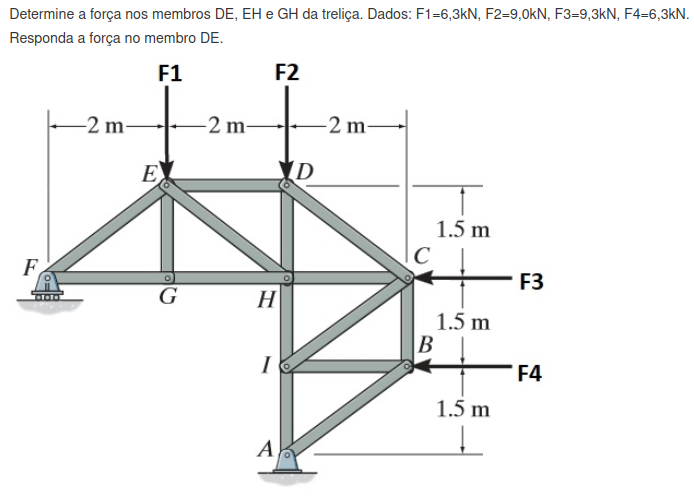

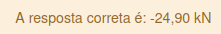

In [3]:
#input data
F1=6.3
F2=9
F3=9.3
F4=6.3

In [4]:
# exemplo youtube input data
'''
F1=40
F2=50
F3=30
F4=40
'''

'\nF1=40\nF2=50\nF3=30\nF4=40\n'

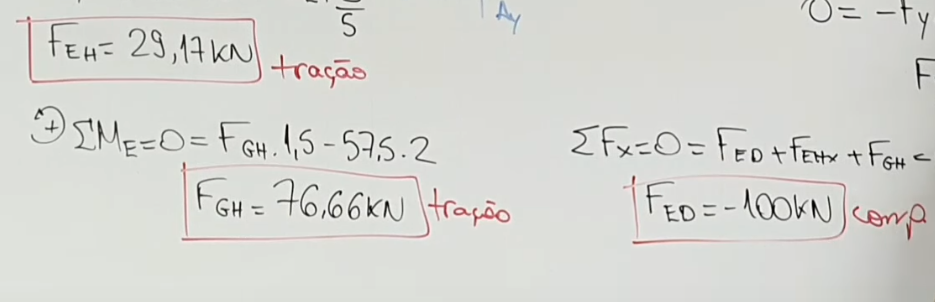

In [5]:
#F1,F2,F3,F4 = sy.symbols('F1 F2 F3 F4')
RFy=(2*F1+3*F3+1.5*F4)/4
FEHy=RFy-F1
dEH=(2**2+1.5**2)**0.5
FEH=FEHy*dEH/1.5
FEHx=FEH*2/dEH
FGH=2*RFy/1.5
FED=-FEHx-FGH
resposta(FED,'kN')

A resposta final é:


-24.90kN

In [6]:
print(RFy)
print(FEHy)
print(FEHx)
print(FEH)
print(FGH)
print(FED)

12.4875
6.187500000000001
8.250000000000002
10.312500000000002
16.650000000000002
-24.900000000000006


# 1.2

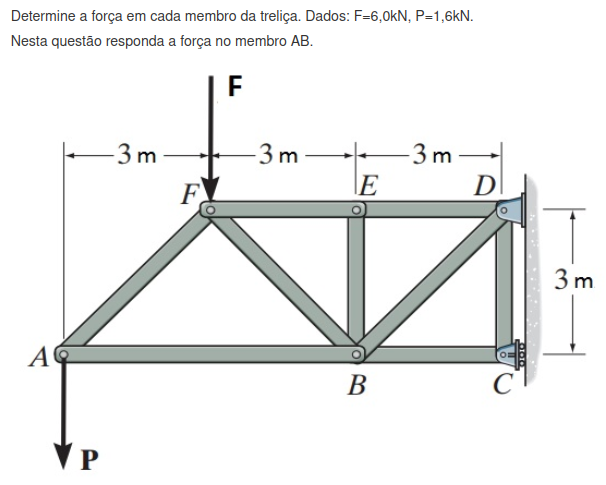

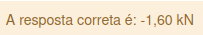

In [7]:
#Input data
F=6
P=1.6

In [8]:
# referencia
F=500
P=800

In [9]:
#resolucao
Fab=-P
resposta(Fab,'kN')

A resposta final é:


-800.00kN

# 1.3)

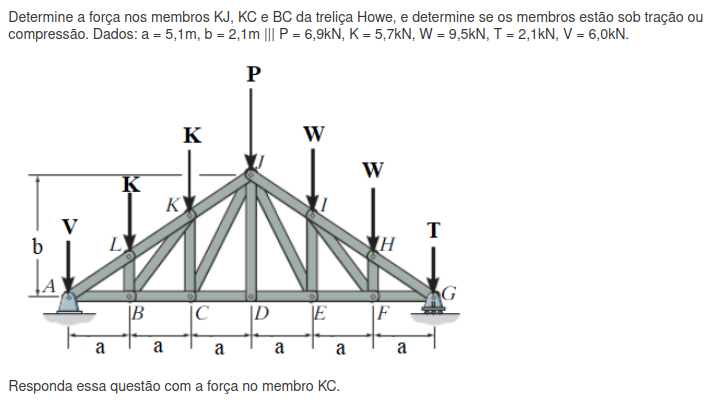

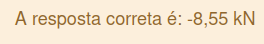

In [10]:
#input data
a=5.1
b=2.1
P=6.9
K=5.7
W=9.5
T=2.1
V=6

In [11]:
'''
#Exempplo
a=2
b=4
P=6
K=5
W=4
T=2
V=3
'''

'\n#Exempplo\na=2\nb=4\nP=6\nK=5\nW=4\nT=2\nV=3\n'

In [12]:
#resolucao
RGy=K/2+P/2+3/2*W+T

dJK=((3*a)**2+b**2)**0.5
FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)
FJKx=3*a/dJK*FJK
FJKy=b/dJK*FJK
FCB=-FJKx
FCK=FJKy+P+2*W+T-RGy
FCK=P+3*W+2*T-K/2
resposta(FCK,'kN')

A resposta final é:


36.75kN

In [13]:
print(RGy)
print(FJK)
print(FCB)
print(FCK)

22.650000000000002
-102.22089925694235
101.27142857142856
36.75


# 1.4)

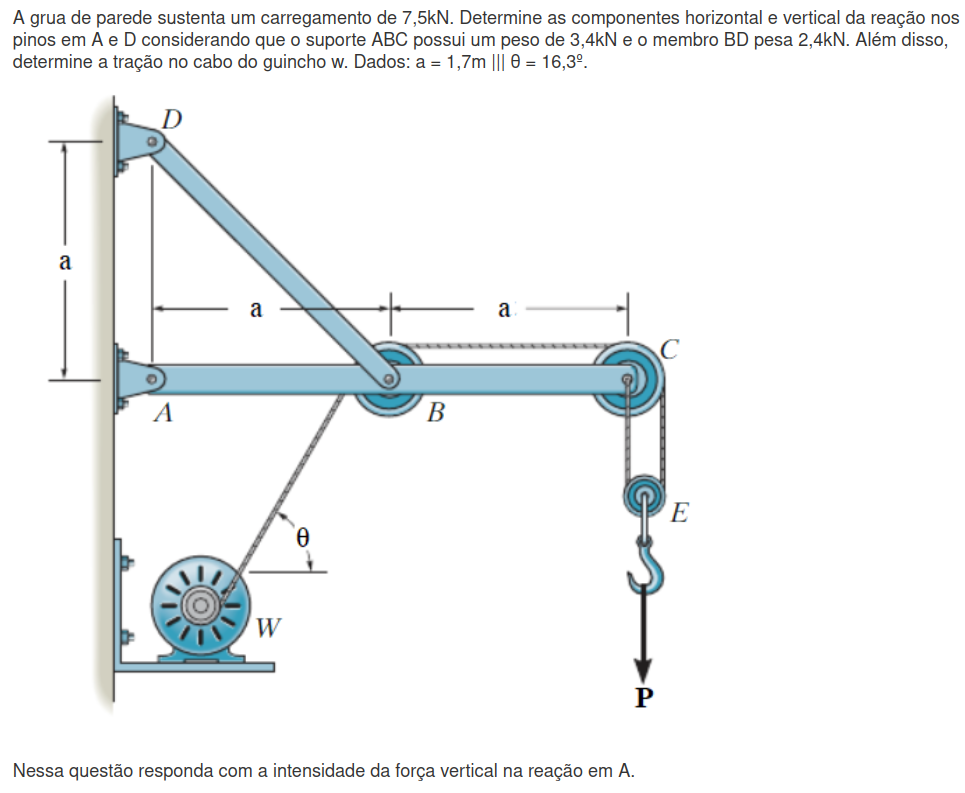

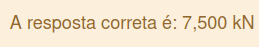

In [14]:
#input data
thetad=16.3
a=1.7
P=7.5
PABC=3.4
PBD=2.4

In [15]:
'''
#input data referencia
a=4
P=700
thetad=60
PBD=40
PABC=100
'''

'\n#input data referencia\na=4\nP=700\nthetad=60\nPBD=40\nPABC=100\n'

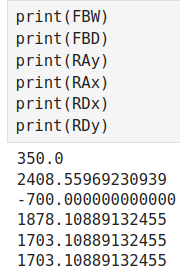

In [16]:
#resolucao sem pesos das estr
theta=np.deg2rad(thetad)
FBW=P/2
FBWy=sy.sin(theta)*FBW
FBWx=sy.cos(theta)*FBW
FBDy=2*P+FBWy
FBD=FBDy/sy.cos(np.pi/4)
FBDx=FBD*sy.sin(np.pi/4)
RAy=P-FBDy+FBWy
RAx=FBDx+FBWx
RDx=FBDx
RDy=FBDy
resposta(abs(RAy),'0kN')

A resposta final é:


7.500kN

In [17]:
print(FBW)
print(FBD)
print(RAy)
print(RAx)
print(RDx)
print(RDy)

3.75
22.7016634340804
-7.50000000000000
19.6517700033599
16.0525001584530
16.0525001584530


In [18]:
#resolucao com pesos das estruturas
theta=np.deg2rad(thetad)
FBW=P/2
FBWy=sy.sin(theta)*FBW
FBWx=sy.cos(theta)*FBW
RDx=-2*P-PBD/2-PABC-FBWy
RAx=FBWx-RDx
RDy=-RDx+PBD/2
RAy=PBD+PABC+P+FBWy-RDy
resposta(abs(RAy),'kN')

A resposta final é:


7.500kN

In [19]:
print(FBW)
print(FBD)
print(RAy)
print(RAx)
print(RDx)
print(RDy)

3.75
22.7016634340804
-7.50000000000000
24.2517700033599
-20.6525001584530
21.8525001584530


# 1.5)

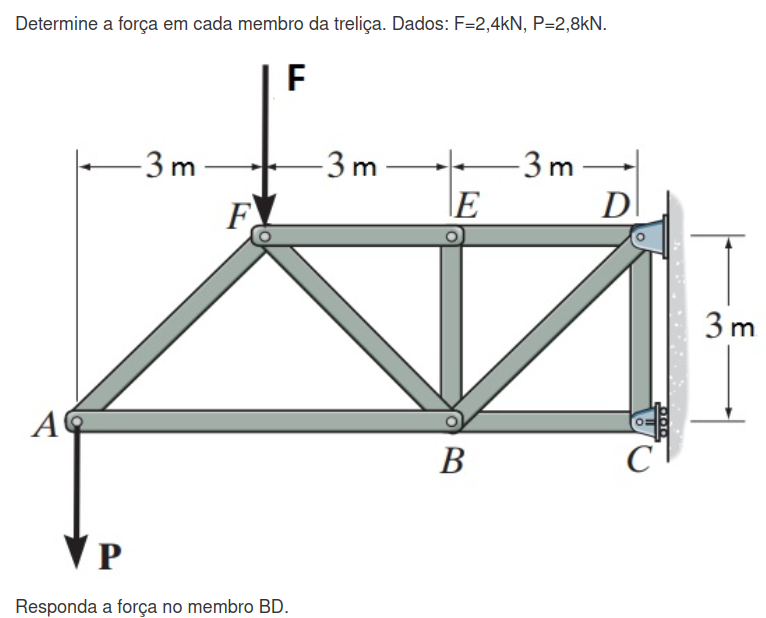

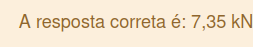

In [110]:
#input
F=2.4
P=2.8

In [111]:
'''
# referencia
F=500
P=800
'''

'\n# referencia\nF=500\nP=800\n'

In [112]:
FBD=(P+F)/sy.sin(np.pi/4)
resposta(FBD,'kN')

A resposta final é:


7.35kN

# 1.6)

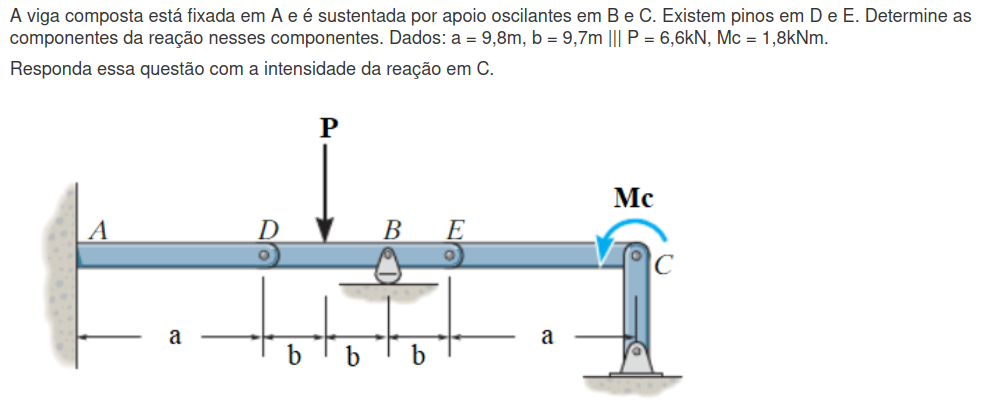

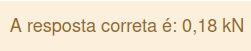

In [23]:
#Input data
a=9.8
b=9.7
P=6.6
Mc=1.8

In [24]:
#resolucao
FEy=Mc/a
FC=-FEy
resposta(abs(FC),'kN')

A resposta final é:


0.18kN

# 1.7)

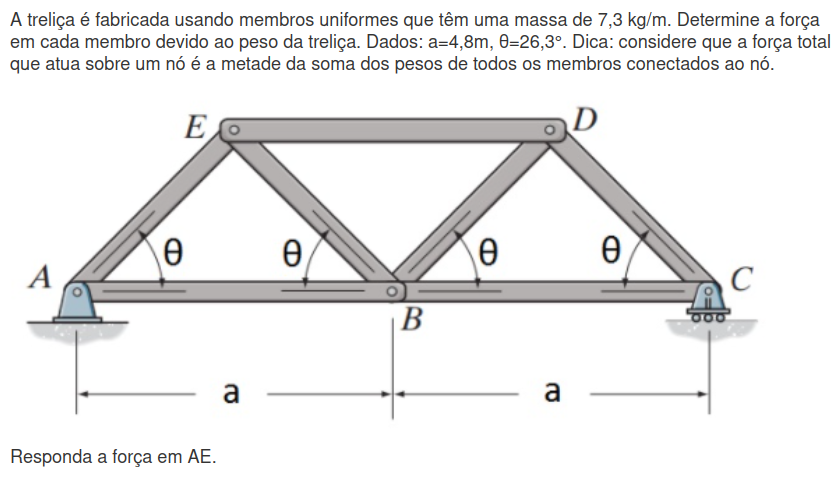

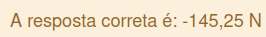

In [113]:
#input data
d=7.3
a=4.8
thetad=26.3

In [114]:
'''
#input data
d=5
a=2
thetad=45
g=9.8
'''

'\n#input data\nd=5\na=2\nthetad=45\ng=9.8\n'

In [115]:
#resolucao
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)
resposta(FEA,'N')

A resposta final é:


-145.25N

In [28]:
print(RCy)
print(FEAy)
print(FEA)

91.6459234590008
-64.3544425942506
-145.246280794158


# 1.8)

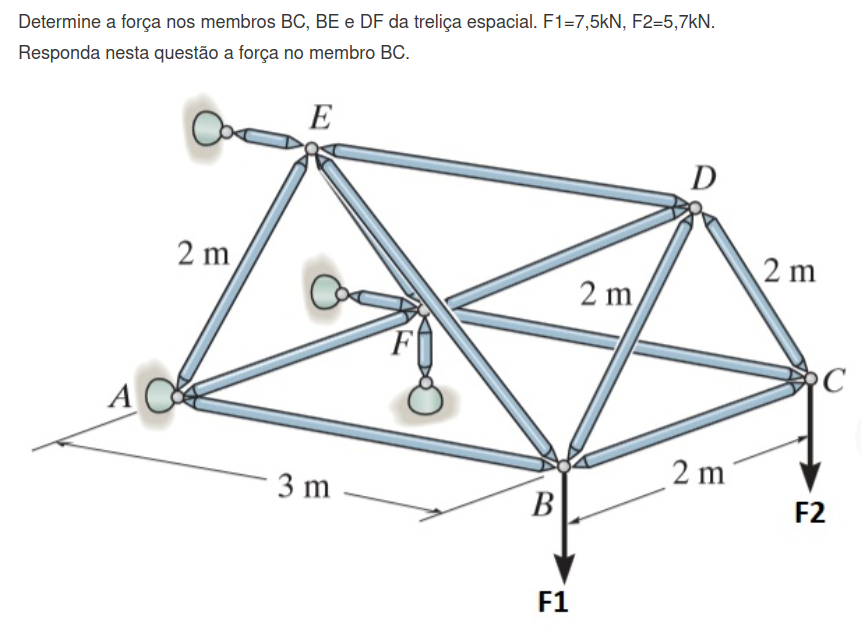

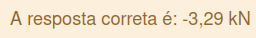

In [29]:
#input data
F1=7.5
F2=5.7

In [30]:
#resolucao
FCDy=F2
FCD=2*3**0.5/3*FCDy
FCDz=FCD/2
FBC=-FCDz
resposta(FBC,'kN')

A resposta final é:


-3.29kN

# 1.9

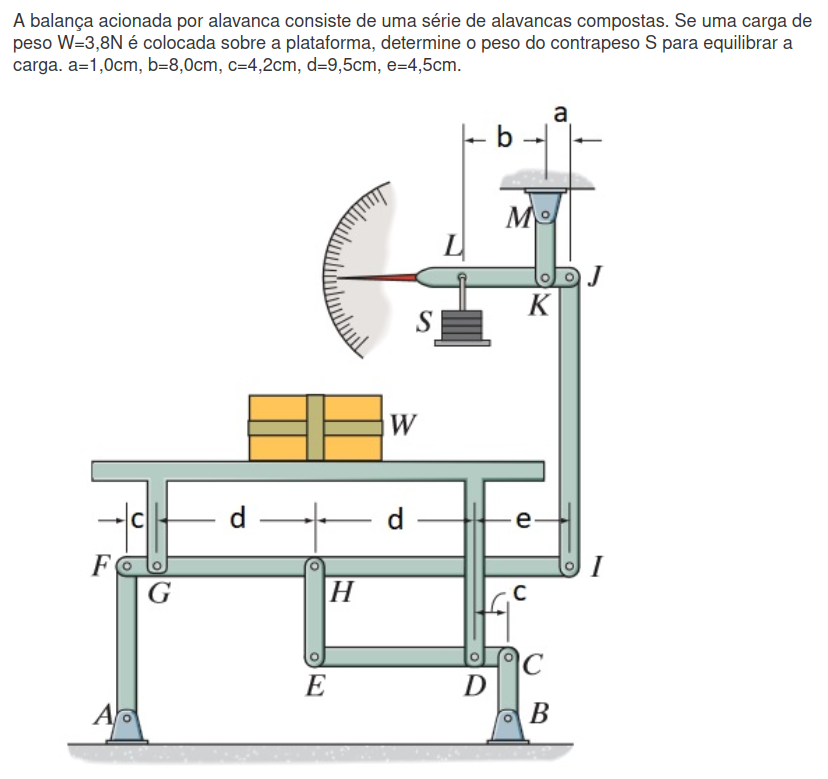

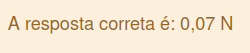

In [31]:
#input data
a=1
b=8
c=4.2
d=9.5
e=4.5
W=3.8

In [32]:
'''
#input data
W=150
d=7.5
e=4.5
c=1.5
b=4
a=1.25
'''

'\n#input data\nW=150\nd=7.5\ne=4.5\nc=1.5\nb=4\na=1.25\n'

In [33]:
Gy=W/2
Dy=W/2
FEHy=Dy*c/(d+c)
Iy=(Gy*c+(c+d)*FEHy)/(c+2*d+e)
S=a*Iy/b
resposta(S,'N')

A resposta final é:


0.07N

In [34]:
print(Gy)
print(Dy)
print(FEHy)
print(Iy)
print(S)

1.9
1.9
0.5824817518248175
0.5761732851985559
0.07202166064981949


# 1.10)

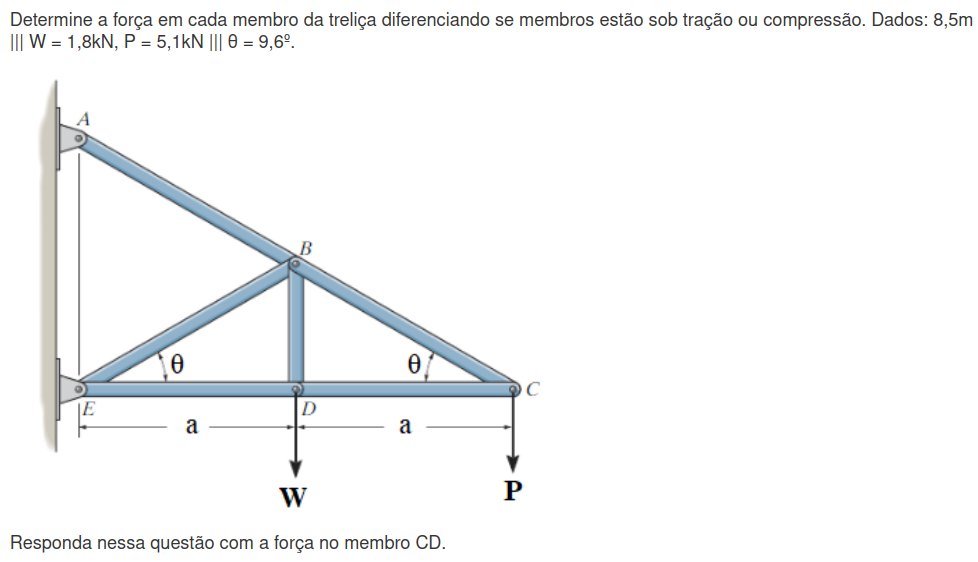

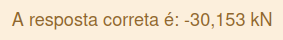

In [35]:
#input data
W=1.8
P=5.1
thetad=9.6

In [36]:
#resolucao
theta=np.deg2rad(thetad)
FCD=-P/sy.tan(theta)
resposta(FCD,'kN')

A resposta final é:


-30.15kN

# T2

# 2.1)

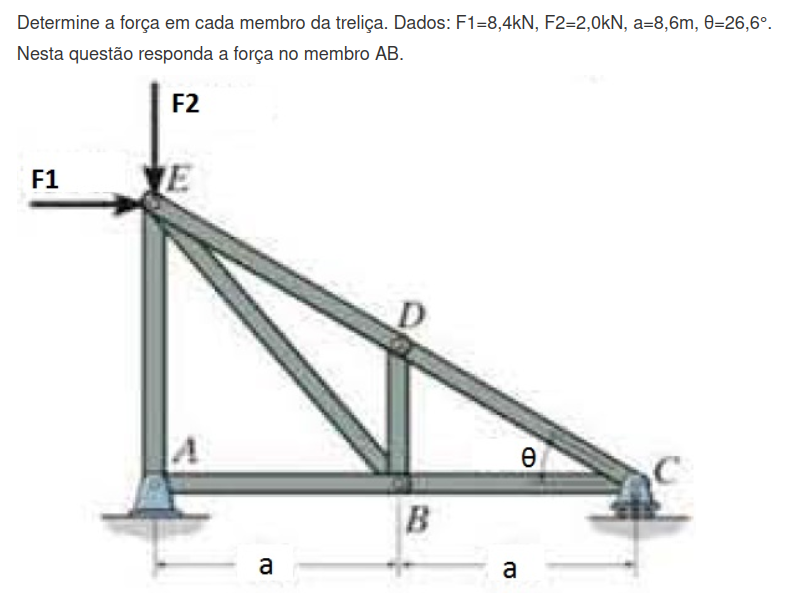

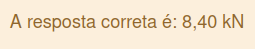

In [37]:
# input data
F1=8.4

In [38]:
'''
# referencia
F1=450
'''

'\n# referencia\nF1=450\n'

In [39]:
#resolucao
FAC=F1
resposta(FAC,'kN')

A resposta final é:


8.40kN

# 2.2)

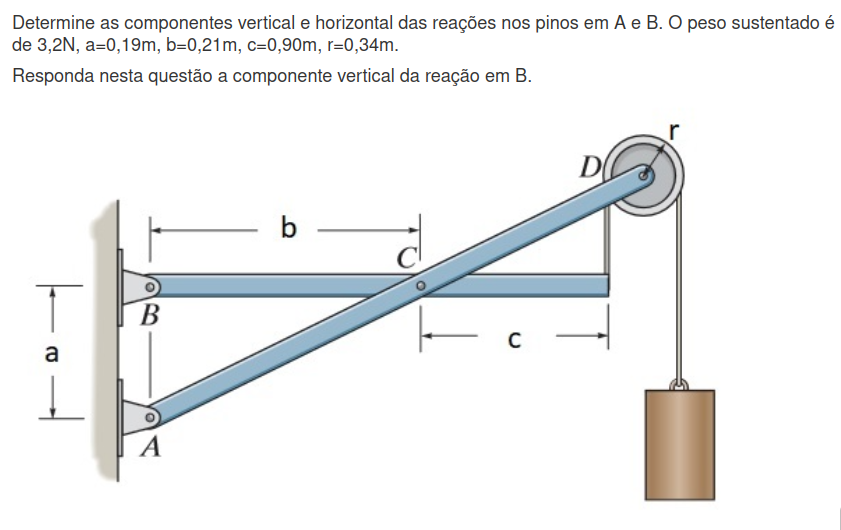

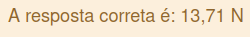

In [40]:
# input data
P=3.2
a=0.19
b=0.21
c=0.9
r=0.34

In [41]:
'''
#referencia
c=0.7
P=80*9.8
b=1
'''

'\n#referencia\nc=0.7\nP=80*9.8\nb=1\n'

In [42]:
#resolucao
By=c*P/b
resposta(By,'N')

A resposta final é:


13.71N

# 2.3)

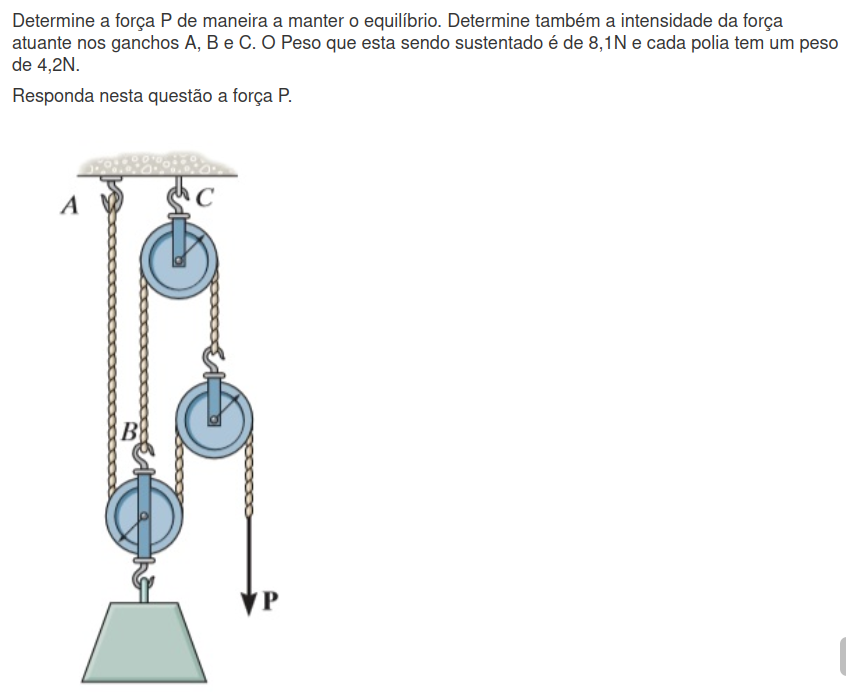

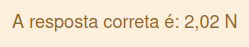

In [43]:
#input 
K=4.2
W=8.1

In [44]:
'''
#referencia
K=10
W=100
'''

'\n#referencia\nK=10\nW=100\n'

In [45]:
P=W/4
resposta(P,'N')

A resposta final é:


2.02N

# 2.4)

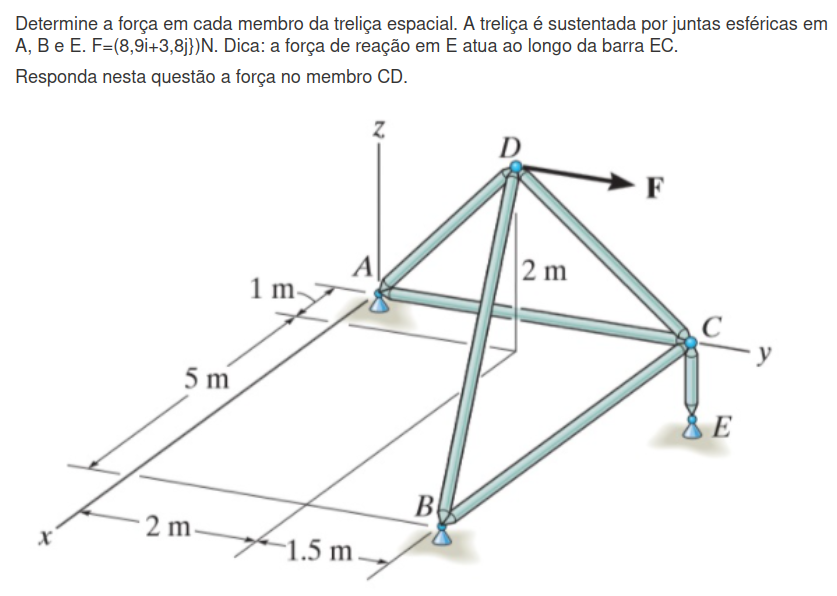

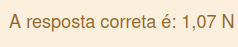

In [120]:
#input
a=8.9
b=3.8

In [121]:
'''
#input referencia
a=-200
b=400
'''

'\n#input referencia\na=-200\nb=400\n'

In [131]:
#resolucao
a,b=sy.symbols('a b')
FDA,FDC,FDB=sy.symbols('F_{DA} F_{DC} F_{DB}')
F=vector(a,b,0)
FDAv=FDA*unit(vector(-1,-2,-2))
FDCv=FDC*unit(vector(-1,1.5,-2))
FDBv=FDB*unit(vector(5,1.5,-2))
EQ=F+FDAv+FDCv+FDBv
res=sy.solve([EQ.dot(i),EQ.dot(j),EQ.dot(k)])
print(res[FDA])
print(res[FDB])
print(res[FDC])

#resposta(res[FDC],'N')

-1.10806881314185e-16*a + 0.857142857142857*b
-0.931694990624912*a - 3.58380791035485e-16*b
0.448763733927875*a - 0.769309258162072*b


In [128]:
a=8.9
b=3.8
0.448763733927875*a - 0.769309258162072*b

1.0706220509422142

# 2.5)

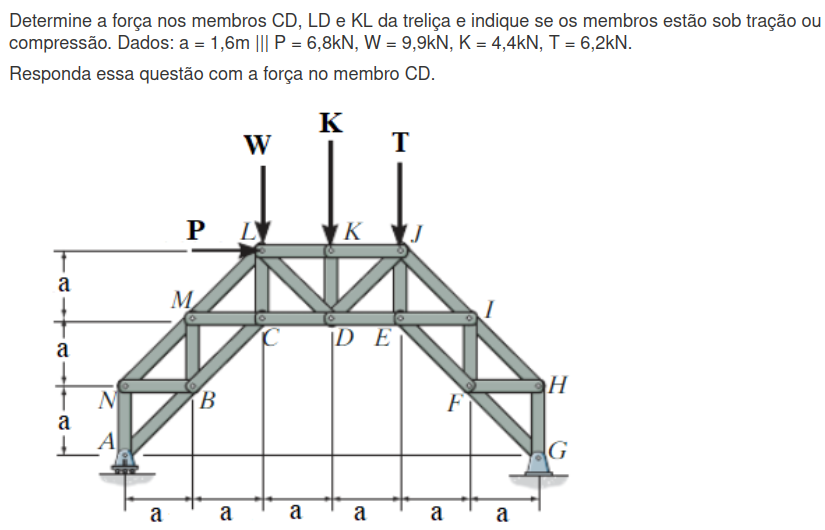

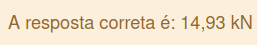

In [49]:
#input
a=1.6
P=6.8
W=9.9
K=4.4
T=6.2

In [50]:
'''
#input referencia
a=8
P=900
W=1000
K=1500
T=1000
'''

'\n#input referencia\na=8\nP=900\nW=1000\nK=1500\nT=1000\n'

In [51]:
#resolucao
Ay=1/6*(-3*P+4*W+3*K+2*T)
FCD=2*Ay
resposta(FCD,'kN')

A resposta final é:


14.93kN

# 2.6)

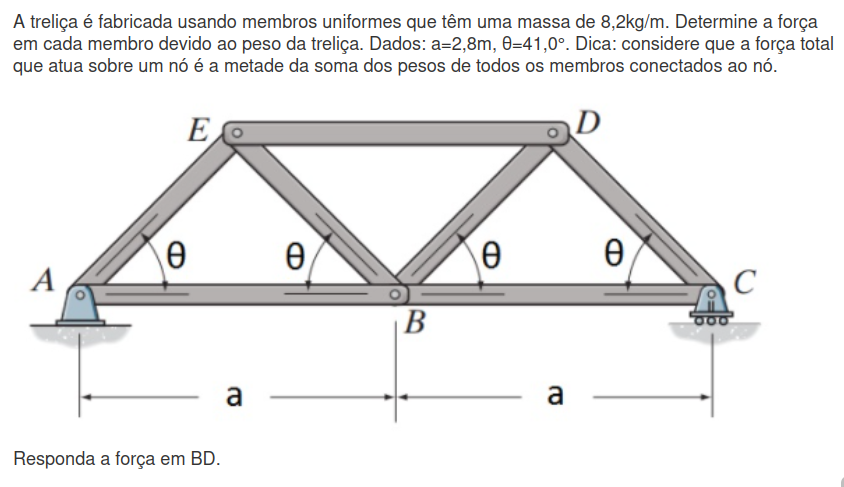

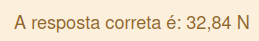

In [52]:
#input data
d=8.2
a=2.8
thetad=41


In [53]:
'''
#input data
d=5
a=2
thetad=45
g=9.8
'''

'\n#input data\nd=5\na=2\nthetad=45\ng=9.8\n'

In [54]:
#resolucao
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
resposta(FBD,'N')

A resposta final é:


29.09N

In [55]:
print(RCy)
print(FEAy)
print(FEA)

64.8622983272887
-45.7767237454665
-69.7753124683067


# 2.7)

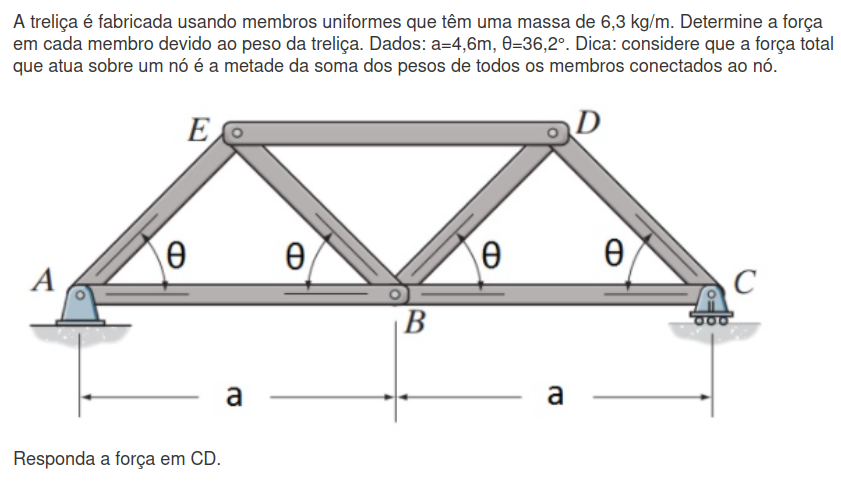

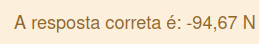

In [56]:
#input data
d=6.3
a=4.6
thetad=36.2


In [57]:
'''
#input data referencia
d=5
a=2
thetad=45
g=9.81
'''

'\n#input data referencia\nd=5\na=2\nthetad=45\ng=9.81\n'

In [58]:
#resolucao
g=1
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
FCD=FEA
resposta(FCD,'N')

A resposta final é:


-94.67N

In [59]:
print(RCy)
print(FEAy)
print(FEA)

79.3825468302284
-55.9144101226713
-94.6729995802446


# 2.8)

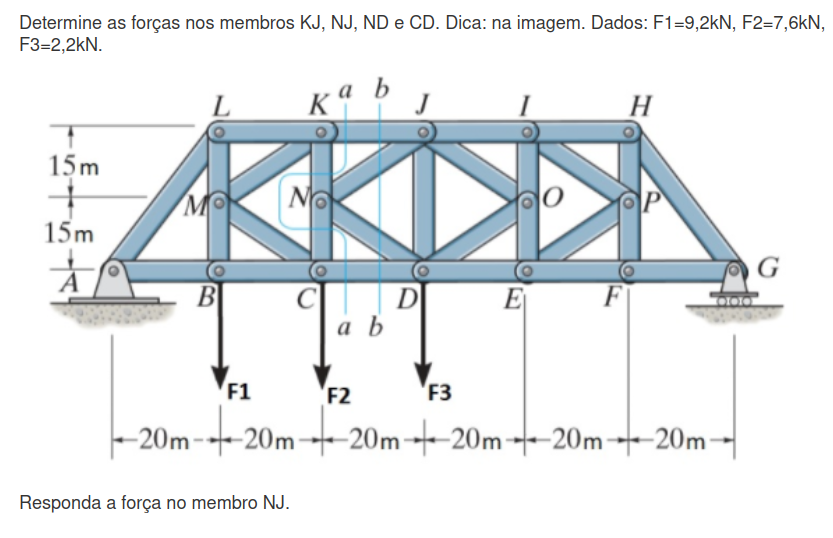

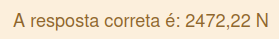

In [60]:
# input
F1=9.2
F2=7.6
F3=2.2

In [61]:
'''
# input referencia
F1=1200
F2=1500
F3=1800
'''

'\n# input referencia\nF1=1200\nF2=1500\nF3=1800\n'

In [62]:
#resolucao
Gy=(F1+2*F2+3*F3)/6
Ay=F1+F2+F3-Gy
FKJ=(2*F1-4*Ay)/3
FNJx=-2*Gy-FKJ
FNJ=5/4*FNJx
resposta(FNJ,'kN')

A resposta final é:


2.47kN

In [63]:
Gy

5.166666666666667

# 2.9)

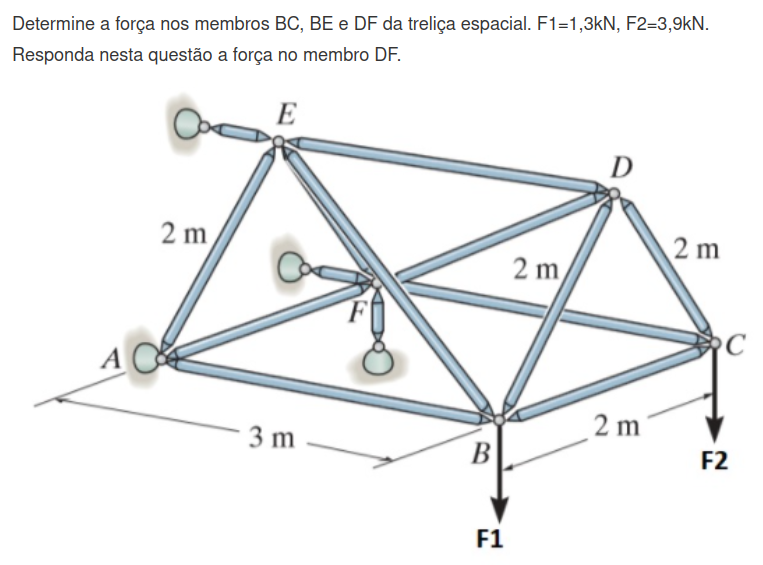

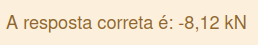

In [64]:
#input data
F1=1.3
F2=3.9

In [65]:
'''
# input referencia
F1=2
F2=2
'''

'\n# input referencia\nF1=2\nF2=2\n'

In [66]:
#resolucao
FCDy=F2
FCD=2*3**0.5/3*FCDy
FCDz=FCD/2
FBC=-FCDz
FDFy=-FCD
FDF=13**0.5/2*FDFy
resposta(FDF,'kN')

A resposta final é:


-8.12kN

# 2.10)

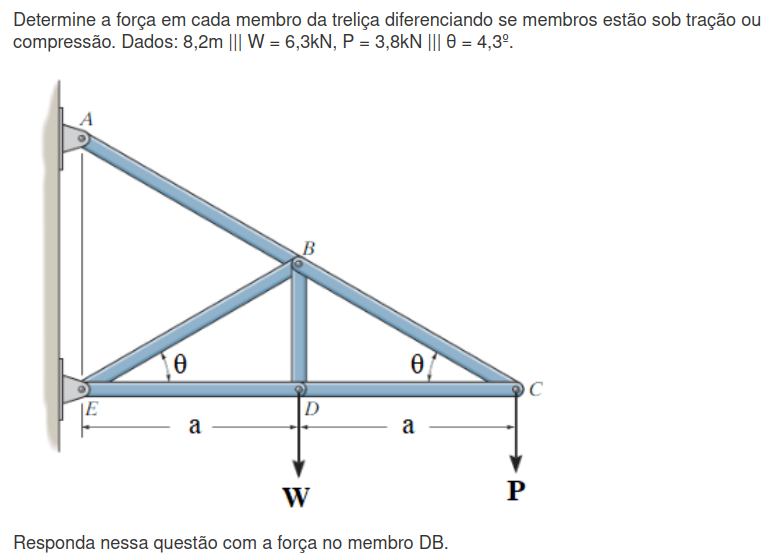

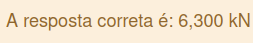

In [67]:
# input data
W=6.3

In [68]:
#resolucao
FDB=W
resposta(FDB,'kN')

A resposta final é:


6.30kN

# T3

# 3.1)

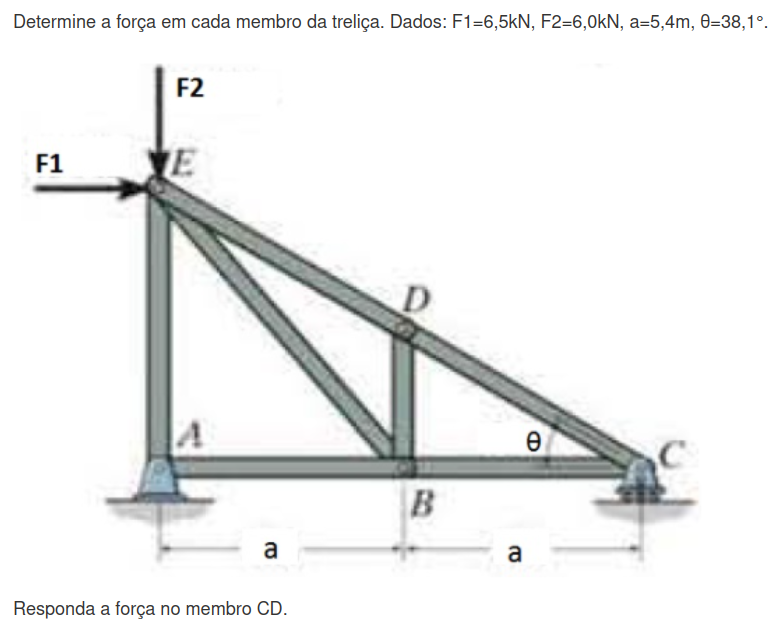

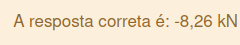

In [69]:
#input
F1=6.5
thetad = 38.1

In [70]:
'''
#input referencia
F1=450
thetad = 30
'''

'\n#input referencia\nF1=450\nthetad = 30\n'

In [71]:
# resolucao
theta=np.deg2rad(thetad)
FCD=-F1/sy.cos(theta)
resposta(FCD,'kN')

A resposta final é:


-8.26kN

# 3.2)

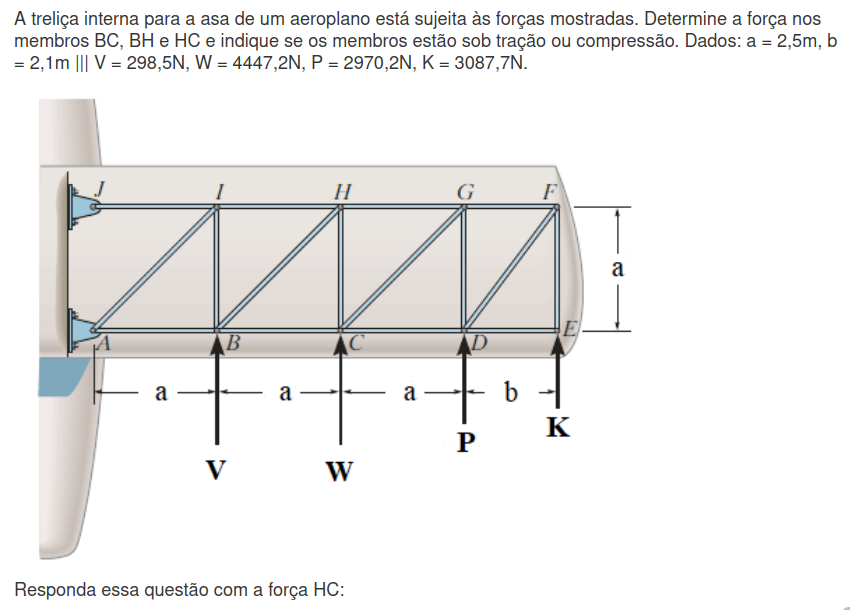

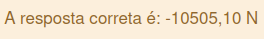

In [72]:
# input data
a=2.5
b=2.1
W=4447.2
P=2970.2
K=3087.7

In [73]:
'''
#input referencia
a=2
b=1.5
W=80
P=60
K=40
'''

'\n#input referencia\na=2\nb=1.5\nW=80\nP=60\nK=40\n'

In [74]:
#resolucao
FCB=1/a*(P*a+K*(a+b))
FHB=(W+P+K)/sy.sin(np.pi/4)
FHC=-W-P-K
resposta(FHC,'N')

A resposta final é:


-10505.10N

In [75]:
print(FCB)
print(FHB)
print(FHC)

8651.568
14856.4548940856
-10505.099999999999


# 3.3)

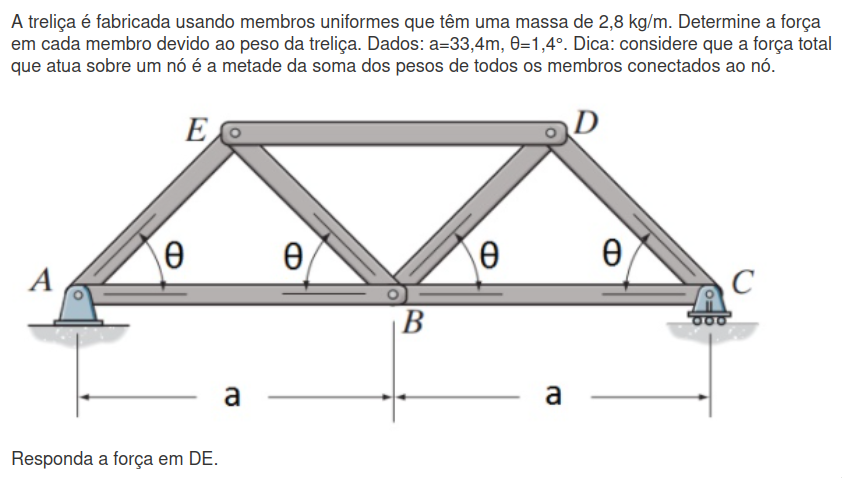

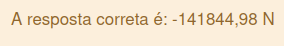

In [116]:
#input data
d=2.8
a=33.4
thetad=1.4
g=1

In [117]:
'''
#input data referencia
d=5
a=2
thetad=45
g=9.81
'''

'\n#input data referencia\nd=5\na=2\nthetad=45\ng=9.81\n'

In [118]:
#resolucao
theta=np.deg2rad(thetad)
L=a/2/sy.cos(theta)
P1=a*d*g
P2=4*L*d*g
P3=2*a*d*g
RCy=(P1+P2+P3)/2
FEAy=RCy-(3*L+2*a)*d*g-L*d*g/2-a*d*g/2
FEA=FEAy/sy.sin(theta)

FBDy=RCy-(3/2*L+a)*d*g
FBD=FBDy/sy.sin(theta)
FCD=FEA

FBDx=FBD*sy.cos(theta)
FCDx=FCD*sy.cos(theta)
FDE=FCDx-FBDx

resposta(FDE,'N')

A resposta final é:


-9567.63N

# 3.4)

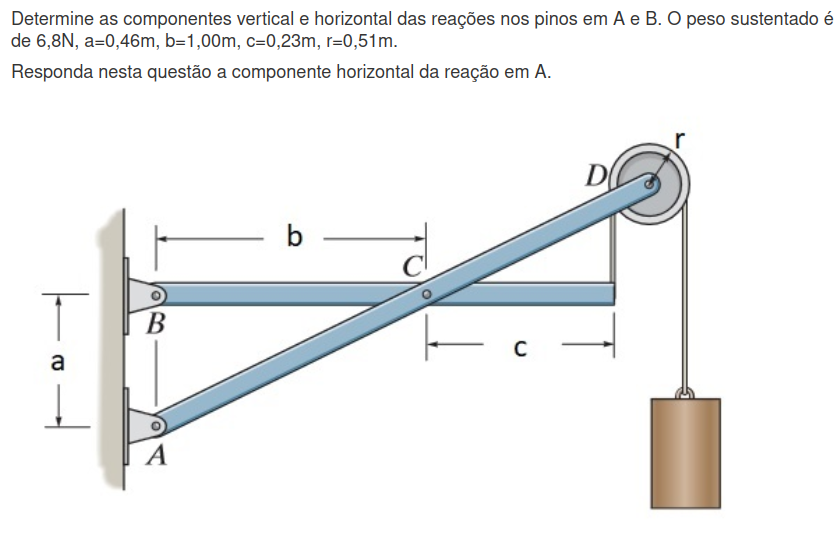

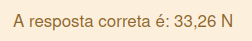

In [80]:
# input
P=6.8
a=0.46
b=1
c=0.23
r=0.51

In [81]:
'''
#referencia
c=0.7
P=80*9.81
b=1
r=0.1
a=0.5
'''

'\n#referencia\nc=0.7\nP=80*9.81\nb=1\nr=0.1\na=0.5\n'

In [82]:
#resolucao

By=P*c/b
Cy=-P*c/b-P
Ay=P*(1-c/b)
Ax=P*(2*r+c+b)/a
Bx=-Ax
resposta(Ax,'N')

A resposta final é:


33.26N

In [83]:
print(Cy)
print(By)
print(Ay)

-8.364
1.564
5.236


# 3.5)

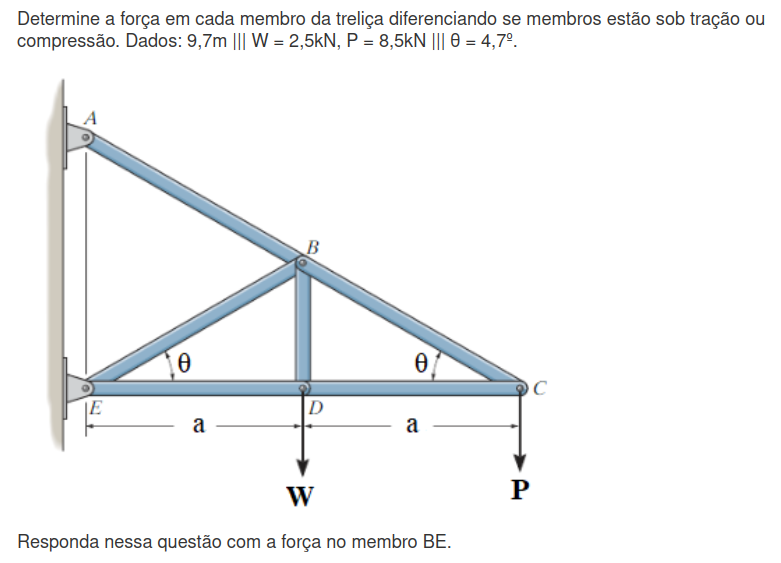

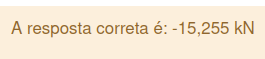

In [84]:
# input data
a=9.7
W=2.5
P=8.5
thetad=4.7

In [85]:
'''
# reference data
a=3
W=2
P=1.5
thetad=30
'''

'\n# reference data\na=3\nW=2\nP=1.5\nthetad=30\n'

In [86]:
# resolucao
theta=np.deg2rad(thetad)
FCB=P/sy.sin(theta)
print(FCB)
FCD=-P/sy.tan(theta)
print(FCD)
FDB=W
print(FDB)
FDE=-P/sy.tan(theta)
print(FDE)
Ex=(2*P+W)/(2*sy.tan(theta))
print(Ex)
Ax=-Ex
print(Ax)
FAB=(2*P+W)/(2*sy.sin(theta))
print(FAB)
FBE=-(1/sy.cos(theta)*((2*P+W)/(2*sy.tan(theta))-P/sy.tan(theta)))
print(FBE)
resposta(FBE,'kN')

103.736327913633
-103.387502769942
2.5
-103.387502769942
118.591547294934
-118.591547294934
118.991670253874
-15.2553423402402
A resposta final é:


-15.26kN

# 3.6)

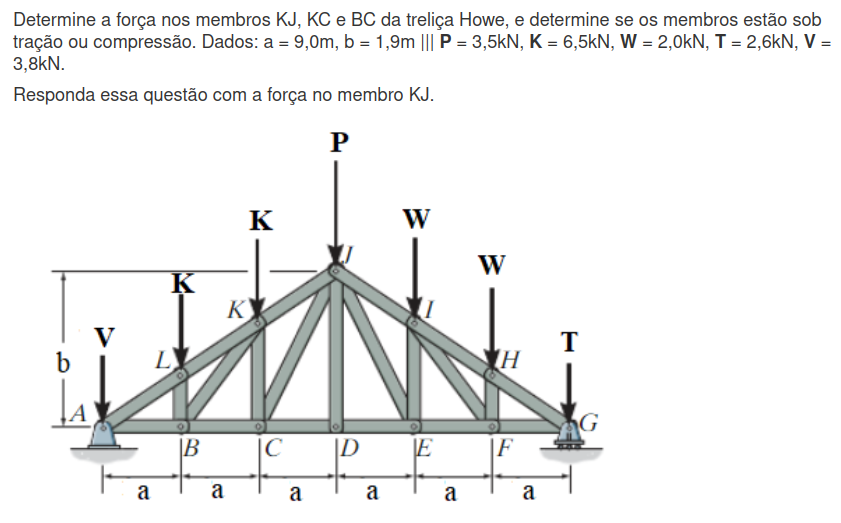

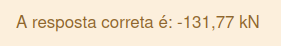

In [87]:
#input data
a=9
b=1.9
P=3.5
K=6.5
W=2.0
T=2.6
V=3.8

In [88]:
'''
#Exempplo
a=2
b=4
P=6
K=5
W=4
T=2
V=3
'''

'\n#Exempplo\na=2\nb=4\nP=6\nK=5\nW=4\nT=2\nV=3\n'

In [89]:
#resolucao
RGy=K/2+P/2+3/2*W+T

dJK=((3*a)**2+b**2)**0.5
FJK=(4*(T-RGy)+P+5*W)*(dJK)/(2*b)
FJKx=3*a/dJK*FJK
FJKy=b/dJK*FJK
FCB=-FJKx
FCK=FJKy+P+2*W+T-RGy
resposta(FJK,'kN')

A resposta final é:


-131.77kN

In [90]:
print(RGy)
print(FJK)
print(FCB)
print(FCK)

10.6
-131.77242945631664
131.44736842105263
-9.75


# 3.7)

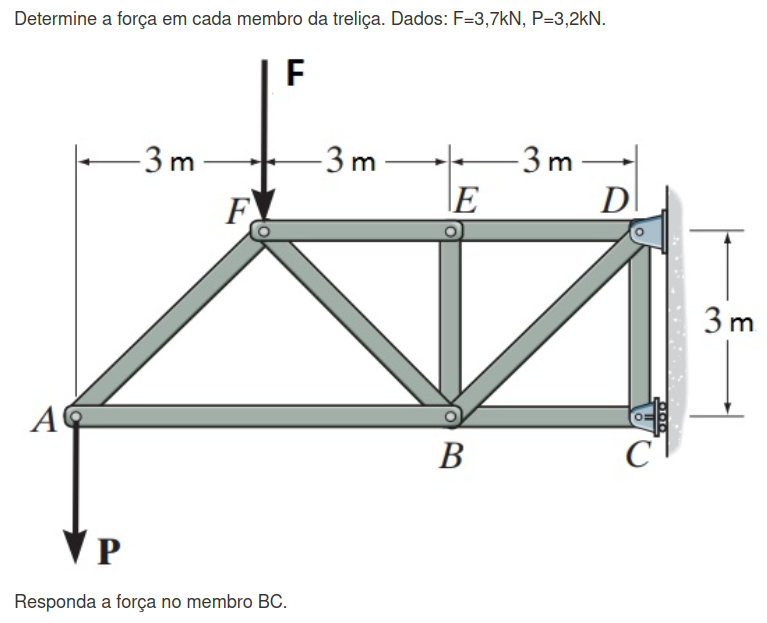

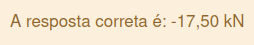

In [91]:
# input 
F=3.7
P=3.2

In [92]:
'''
# referencia
F=500
P=800
'''

'\n# referencia\nF=500\nP=800\n'

In [93]:
FAF=2**0.5*P
FAB=-P
FCD=0
FCB=-3*P-2*F
FDE=2*P+F
FEF=2*P+F
FEB=0
FBF=-2**0.5*(F+P)
FDB=2**0.5*(F+P)
resposta(FCB,'kN')

A resposta final é:


-17.00kN

In [94]:
print(FAF)
print(FCD)
print(FCB)
print(FDE)
print(FEF)
print(FEB)
print(FBF)
print(FDB)

4.525483399593905
0
-17.0
10.100000000000001
10.100000000000001
0
-9.758073580374356
9.758073580374356


# 3.8)

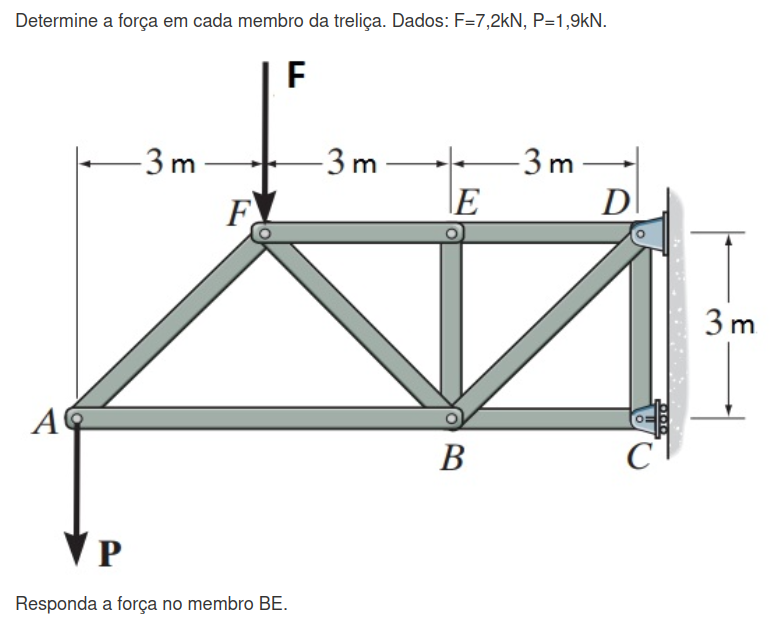

In [95]:
# input 
F=7.2
P=1.9

In [96]:
'''
# referencia
F=500
P=800
'''

'\n# referencia\nF=500\nP=800\n'

In [97]:
FAF=2**0.5*P
FAB=-P
FCD=0
FCB=-3*P-2*F
FDE=2*P+F
FEF=2*P+F
FEB=0
FBF=-2**0.5*(F+P)
FDB=2**0.5*(F+P)
resposta(FEB,'kN')

A resposta final é:


0.00kN

In [98]:
print(FAF)
print(FCD)
print(FCB)
print(FDE)
print(FEF)
print(FEB)
print(FBF)
print(FDB)

2.6870057685088806
0
-20.1
11.0
11.0
0
-12.869343417595166
12.869343417595166


# 3.9)

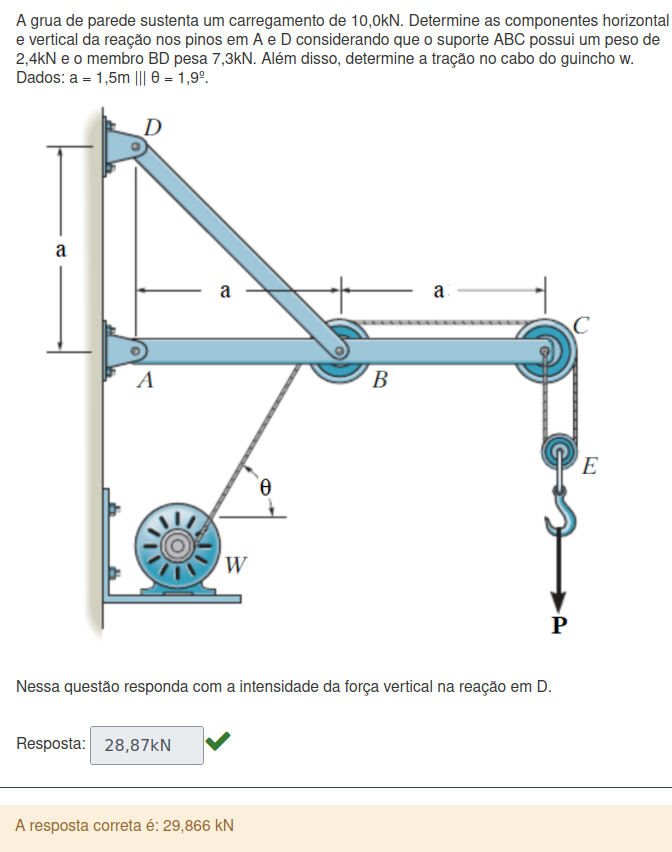

In [99]:
#input data
thetad=1.9
a=1.5
P=10
PABC=2.4
PBD=7.3

In [100]:
#resolucao com pesos das estruturas
theta=np.deg2rad(thetad)
FBW=P/2
FBWy=sy.sin(theta)*FBW
FBWx=sy.cos(theta)*FBW
RDx=-2*P-PBD/2-PABC-FBWy
RAx=FBWx-RDx
RDy=-RDx+PBD/2
RAy=PBD+PABC+P+FBWy-RDy
resposta(abs(RDy),'kN')

A resposta final é:


29.87kN

# 3.10)

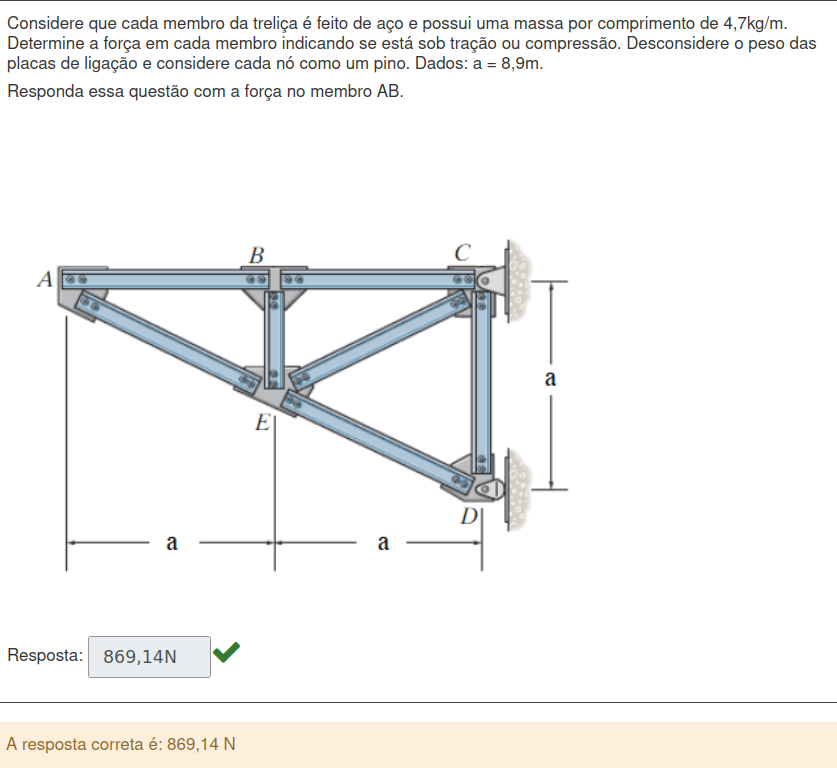

In [108]:
#input
d=4.7
a=8.9

In [109]:
#resolucao
g=9.81
FAB=a*d*(1+(5**0.5)/2)*g
resposta(FAB,'N')

A resposta final é:


869.14N